<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Credit_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load datasets
df_customer = pd.read_csv('/content/customer_data.csv')
df_payment = pd.read_csv('/content/payment_data.csv')

# Merge on a common key — assuming 'CustomerID' is present
df = pd.merge(df_customer, df_payment, on='id', how='inner')

In [ ]:
# Preview data
print(df.head())
print(df.info())

   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      1  54982665      5  1245.5      3   77000.0      2     15      5   
2      1  54982665      5  1245.5      3   77000.0      2     15      5   
3      1  54982665      5  1245.5      3   77000.0      2     15      5   
4      0  59004779      4  1277.0      1  113000.0      2      8     -1   

   fea_8  ...  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  prod_limit  \
0    109  ...       0       0        0           9         10     60500.0   
1    109  ...       0       0        0          18         10         NaN   
2    109  ...       0       0        0           1          5         NaN   
3    109  ...       2      26    11906           6         10         NaN   
4    100  ...       0       0        0           4          6         NaN   

   update_date  new_balance  highest_balance  report_date  
0   31/01/2015       6657.

In [ ]:
# 2. Exploratory Data Analysis (EDA)
print(df.describe())
print(df.isnull().sum())  # Check for missing values

             label            id        fea_1        fea_2        fea_3  \
count  8250.000000  8.250000e+03  8250.000000  7222.000000  8250.000000   
mean      0.168121  5.782173e+07     5.522667  1286.156813     2.319636   
std       0.373997  1.822724e+06     1.388358    52.002429     0.887414   
min       0.000000  5.498235e+07     1.000000  1116.500000     1.000000   
25%       0.000000  5.499050e+07     4.000000  1248.500000     1.000000   
50%       0.000000  5.898905e+07     5.000000  1283.000000     3.000000   
75%       0.000000  5.899655e+07     7.000000  1317.500000     3.000000   
max       1.000000  5.900624e+07     7.000000  1481.000000     3.000000   

              fea_4        fea_5        fea_6        fea_7        fea_8  ...  \
count  8.250000e+03  8250.000000  8250.000000  8250.000000  8250.000000  ...   
mean   1.386712e+05     1.940848    11.013939     4.881091   100.026303  ...   
std    1.081565e+05     0.235922     2.694611     3.031902    12.540081  ...   
min 

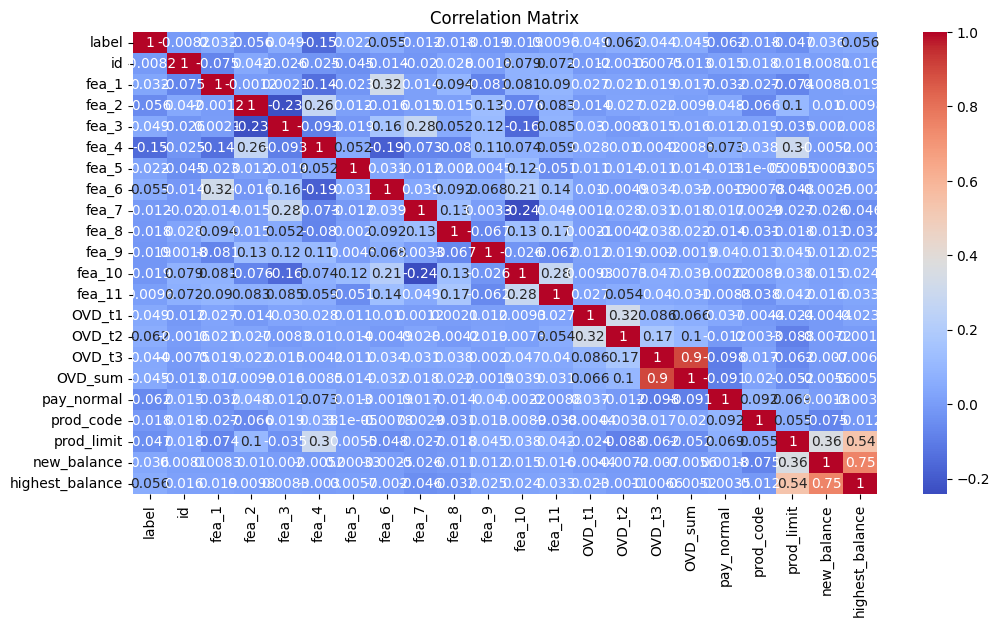

In [ ]:
# Optional: Visualize correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 3. Preprocessing
# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Define X and y
# Assuming 'Defaulted' or similar is the target variable
target_col = 'Defaulted' if 'Defaulted' in df.columns else df.columns[-1]  # guess last column if unsure
X = df.drop([target_col], axis=1)
y = df[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Build Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=4, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.14909090909090908


In [ ]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         5
          38       0.00      0.00      0.00         1
   

In [ ]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   3]
 [  0   0   0 ...   0   0 225]]


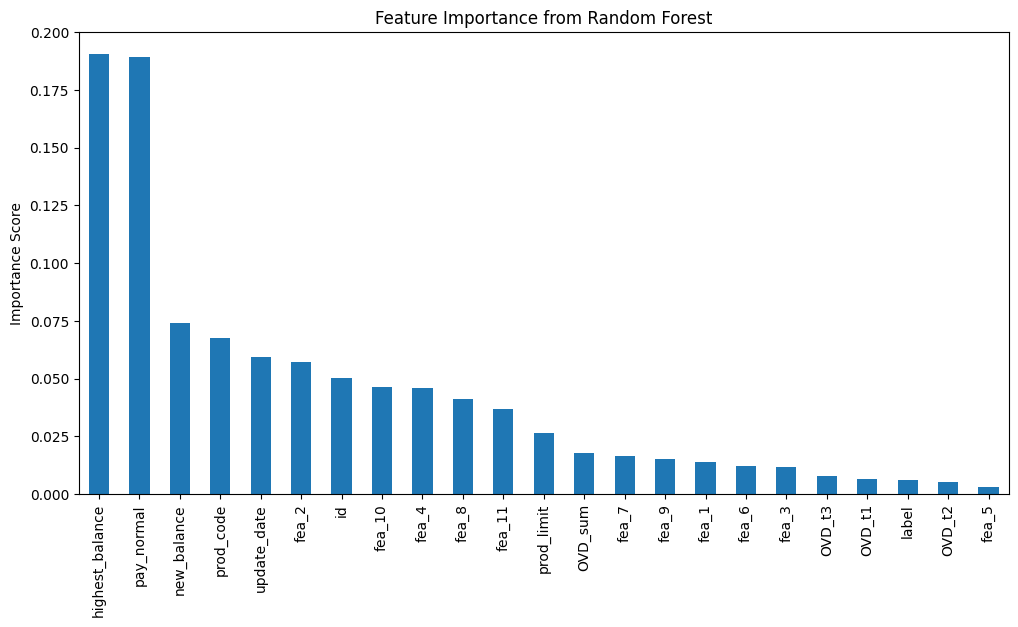

In [ ]:

# 5. Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.show()

**Top predictors may include:**

highest_balance

pay_normal

New_balance

product_code

updated_date

In [ ]:
'''
# 6. Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
'''
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 4],
    'criterion': ['gini']  # Try one criterion first
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Try 10 random combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)



Best Parameters: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best Accuracy: 0.15
